In [2]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting
matplotlib.style.use('ggplot')

In [3]:
env = BlackjackEnv()

In [12]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    # Implement this!
    for episode_num in range(num_episodes):
        episode = []
        state = env.reset() #resets the environment and gets the first state
        for t in range(100): #check for 100 time steps
            action = policy(state) #get the action based on the policy
            next_state, reward, done, _ = env.step(action) #obtain the next state, reward, done indicates if the next state is an end state by taking a step in the env by doing the chosen action
            episode.append((state, action, reward)) #form the episode
            if done: #indicates whether the end state has reached
                break
            state = next_state
        
        #Find all the states occured in this episode and conver it into tuple to use as the dict key
        states = set([tuple(x[0]) for x in episode])
        for state in states:
            #find the first occurence
            first = next(i for i,x in enumerate(episode) if x[0] == state) #the statement inside next gives a list of indices which have state as the selected state and next gives the first element
            #sum the rewards after this point
            #just doing incremental mean. Not using the notes equation
            G = sum([x[2] * (discount_factor**i) for i,x in enumerate(episode[first:])])
            returns_sum[state] += G
            returns_count[state] += 1
            V[state] = returns_sum[state]/returns_count[state]
    return V    

In [13]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

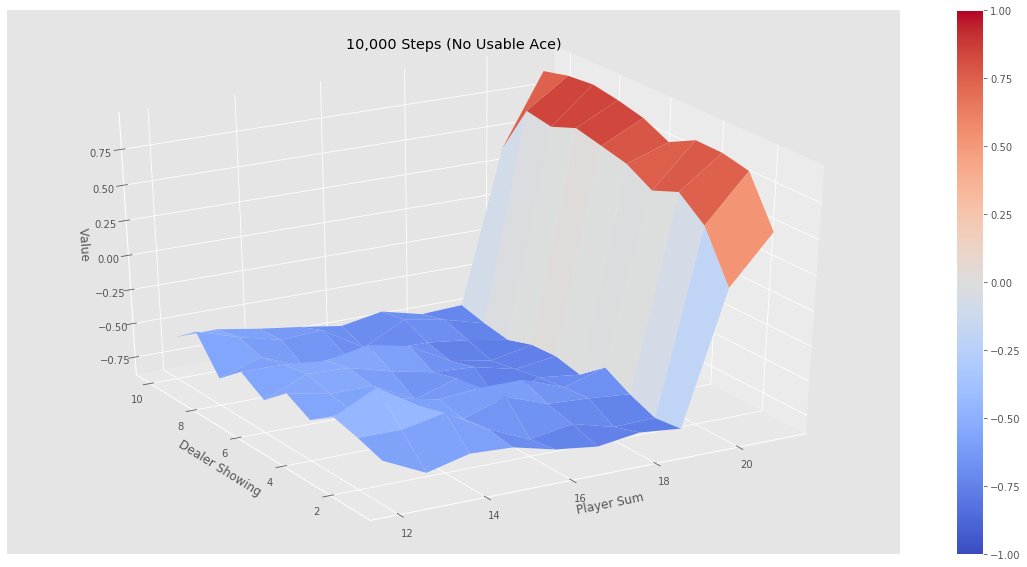

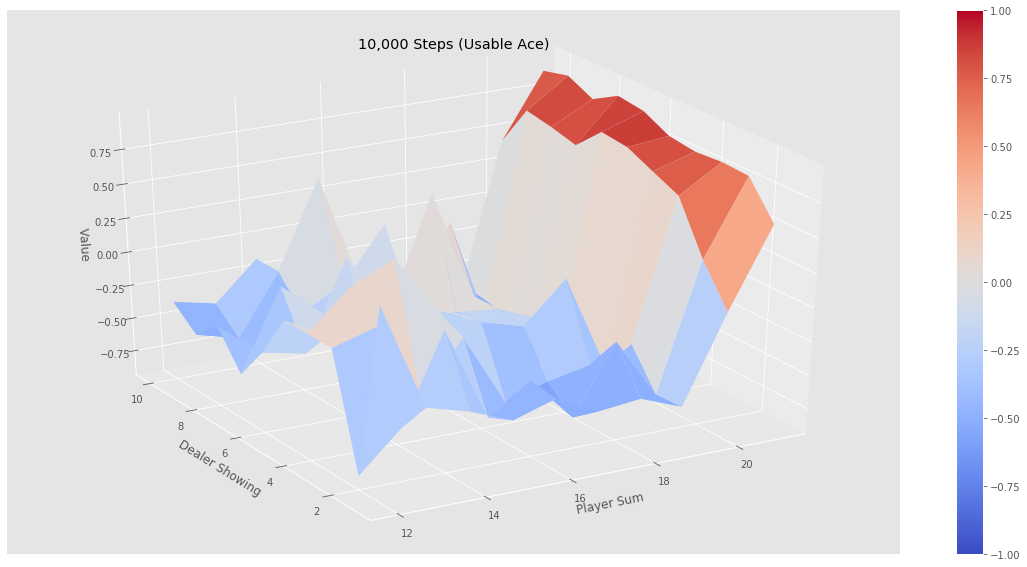

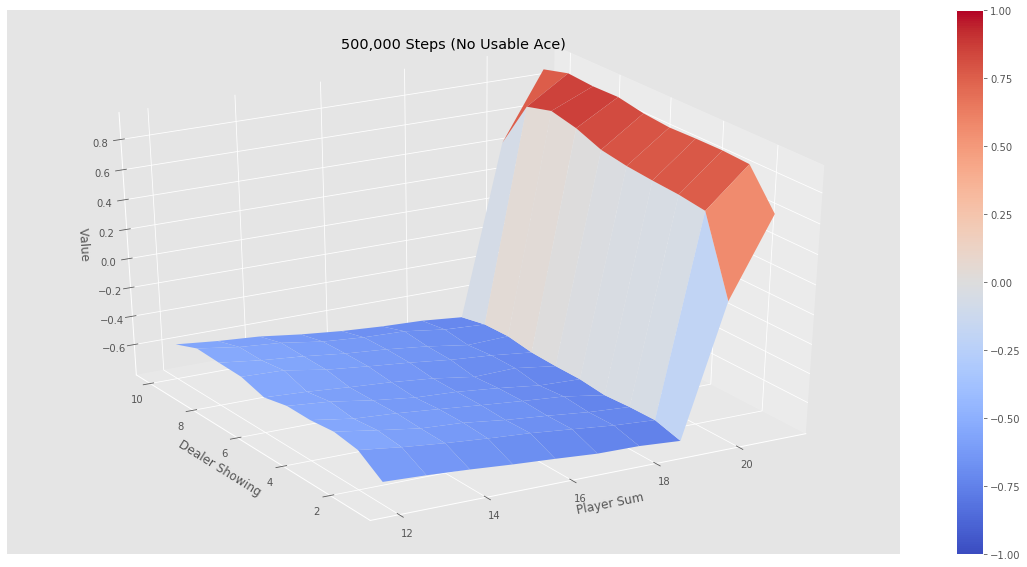

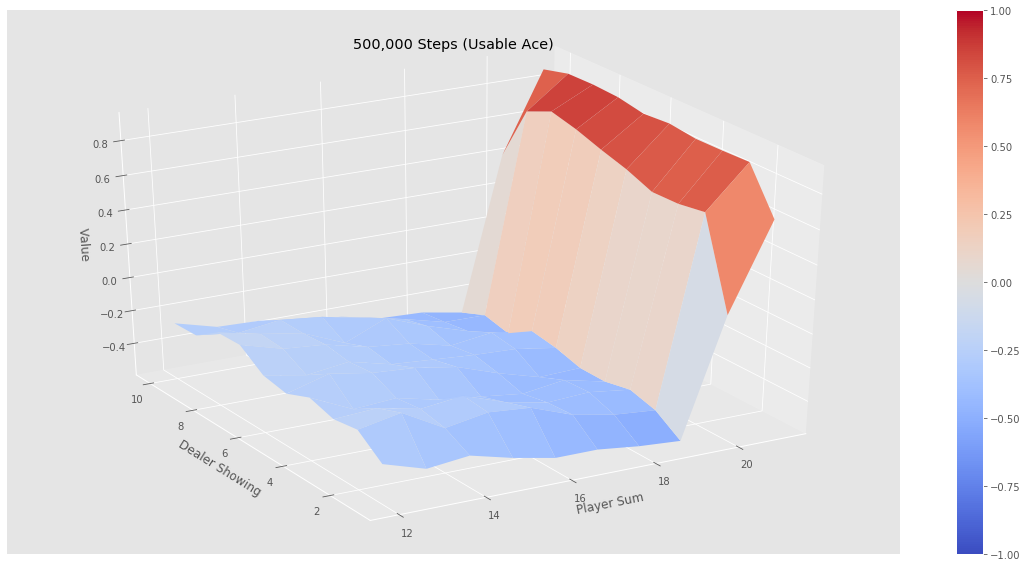

In [14]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")